In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
dema = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'Demand')
comp = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'CompetitorPrice')
pcos = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'ProductionCost')
seaso = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'Seasonality')
slev = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'StockLevel')

fpri = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'FinalPrice')

In [5]:
dema['L'] = fuzz.trapmf(dema.universe, [0, 0, 0.5, 1])
dema['M'] = fuzz.trapmf(dema.universe, [0.5, 1, 2, 2.5])
dema['H'] = fuzz.trapmf(dema.universe, [2, 2.5, 3, 3])

In [6]:
comp['L'] = fuzz.trapmf(comp.universe, [0, 0, 0.5, 1])
comp['M'] = fuzz.trapmf(comp.universe, [0.5, 1, 2, 2.5])
comp['H'] = fuzz.trapmf(comp.universe, [2, 2.5, 3, 3])

In [7]:
pcos['L'] = fuzz.trapmf(pcos.universe, [0, 0, 0.5, 1])
pcos['M'] = fuzz.trapmf(pcos.universe, [0.5, 1, 2, 2.5])
pcos['H'] = fuzz.trapmf(pcos.universe, [2, 2.5, 3, 3])

In [8]:
seaso['OP'] = fuzz.trapmf(seaso.universe, [0, 0, 0.5, 1])
seaso['N'] = fuzz.trapmf(seaso.universe, [0.5, 1, 2, 2.5])
seaso['P'] = fuzz.trapmf(seaso.universe, [2, 2.5, 3, 3])

In [9]:
slev['L'] = fuzz.trapmf(slev.universe, [0, 0, 0.5, 1])
slev['M'] = fuzz.trapmf(slev.universe, [0.5, 1, 2, 2.5])
slev['H'] = fuzz.trapmf(slev.universe, [2, 2.5, 3, 3])

In [10]:
fpri['VL'] = fuzz.trapmf(fpri.universe, [0, 0, 0.5, 1])
fpri['L'] = fuzz.trapmf(fpri.universe, [0.5, 1, 1.5, 2])
fpri['M'] = fuzz.trapmf(fpri.universe, [1.5, 2, 3, 3.5])
fpri['H'] = fuzz.trapmf(fpri.universe, [3, 3.5, 4, 4.5])
fpri['VH'] = fuzz.trapmf(fpri.universe, [4, 4.5, 5, 5])

In [11]:
rule1 = ctrl.Rule(dema['H'] & comp['H'] & slev['L'], fpri['VH'])
rule2 = ctrl.Rule(dema['H'] & seaso['P'] & slev['L'], fpri['VH'])
rule3 = ctrl.Rule(dema['M'] & pcos['H'] & slev['L'], fpri['VH'])
rule4 = ctrl.Rule(dema['H'] & comp['M'] & slev['M'], fpri['H'])
rule5 = ctrl.Rule(dema['M'] & comp['H'] & slev['L'], fpri['H'])
rule6 = ctrl.Rule(dema['M'] & seaso['P'] & slev['M'], fpri['H'])
rule7 = ctrl.Rule(dema['M'] & comp['M'] & slev['M'], fpri['M'])
rule8 = ctrl.Rule(dema['M'] & comp['H'] & slev['M'], fpri['M'])
rule9 = ctrl.Rule(dema['L'] & comp['H'] & slev['M'], fpri['M'])
rule10 = ctrl.Rule(dema['M'] & pcos['M'] & slev['M'], fpri['M'])
rule11 = ctrl.Rule(dema['L'] & comp['L'] & slev['H'], fpri['L'])
rule12 = ctrl.Rule(dema['M'] & pcos['M'] & slev['H'], fpri['L'])
rule13 = ctrl.Rule(dema['L'] & seaso['OP'] & slev['H'], fpri['L'])
rule14 = ctrl.Rule(dema['L'] & comp['L'] & slev['H'], fpri['VL'])
rule15 = ctrl.Rule(dema['L'] & seaso['OP'] & slev['H'], fpri['VL'])
rule16 = ctrl.Rule(dema['M'] & comp['L'] & slev['H'], fpri['VL'])

2.4999999999999996


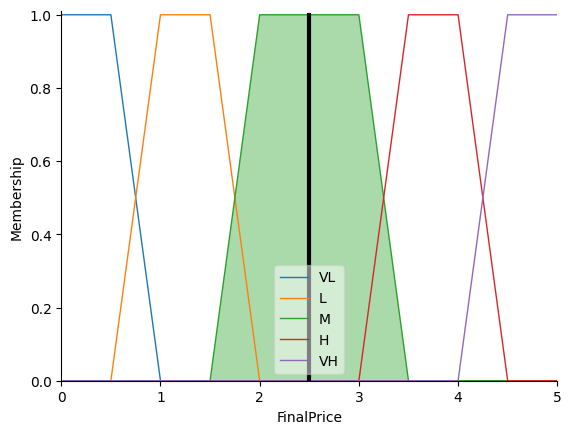

In [12]:
pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
pricing_sim = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing_sim.input['Demand'] = 2
pricing_sim.input['CompetitorPrice'] = 1
pricing_sim.input['ProductionCost'] = 2
pricing_sim.input['Seasonality'] = 1
pricing_sim.input['StockLevel'] = 2

pricing_sim.compute()

print(pricing_sim.output['FinalPrice'])
fpri.view(sim=pricing_sim)